In [1]:
import networkx as nx
import numpy.random as rnd
import matplotlib.pyplot as plt

In [2]:
# Алгоритм Краскала поиска минимального остова графа

def Kraskal (R):
    Rs = sorted(R, key=lambda x: x[2])
    U = set()   # список соединенных вершин
    D = {}      # словарь списка изолированных групп вершин
    T = []      # список ребер остова

    for r in Rs:
        if r[0] not in U or r[1] not in U:  # проверка для исключения циклов в остове
            if r[0] not in U and r[1] not in U: # если обе вершины не соединены, то
                D[r[0]] = [r[0], r[1]]          # формируем в словаре ключ с номерами вершин
                D[r[1]] = D[r[0]]               # и связываем их с одним и тем же списком вершин
            else:                           # иначе
                if not D.get(r[0]):             # если в словаре нет первой вершины, то
                    D[r[1]].append(r[0])        # добавляем в список первую вершину
                    D[r[0]] = D[r[1]]           # и добавляем ключ с номером первой вершины
                else:
                    D[r[0]].append(r[1])        # иначе, все то же самое делаем со второй вершиной
                    D[r[1]] = D[r[0]]

            T.append(r)             # добавляем ребро в остов
            U.add(r[0])             # добавляем вершины в множество U
            U.add(r[1])

    for r in Rs:    # проходим по ребрам второй раз и объединяем разрозненные группы вершин
        if r[1] not in D[r[0]]:     # если вершины принадлежат разным группам, то объединяем
            T.append(r)             # добавляем ребро в остов
            gr1 = D[r[0]]
            D[r[0]] += D[r[1]]      # объединем списки двух групп вершин
            D[r[1]] += gr1

    #print(T)
    
    # Вывод графиков
    graph1 = nx.Graph()
    graph2 = nx.Graph()
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(16)
    
    ax1 = fig.add_subplot(121)
    graph1.add_weighted_edges_from(Rs)
    #nx.draw_circular(graph1,  
    nx.draw(graph1,
             node_color='red',
             node_size=500,
             with_labels=True)
    #plt.axis('equal')

    ax2 = fig.add_subplot(122)
    graph2.add_weighted_edges_from(T)
    nx.draw_circular(graph2,
#              node_color='red',
             node_size=1000,
             with_labels=True)
    plt.axis('equal')

    fig.suptitle(f'Число вершин: {graph1.number_of_nodes()}',
                  y = 1,
                  fontsize = 30)
    ax1.set_title(f'Исходный граф, {graph1.number_of_edges()}',
                    fontfamily = 'serif',
                    fontsize = 25)
    ax2.set_title(f'Остовное дерево, {graph2.number_of_edges()}',
                    fontfamily = 'serif',
                    fontsize = 25)
    
    plt.show()

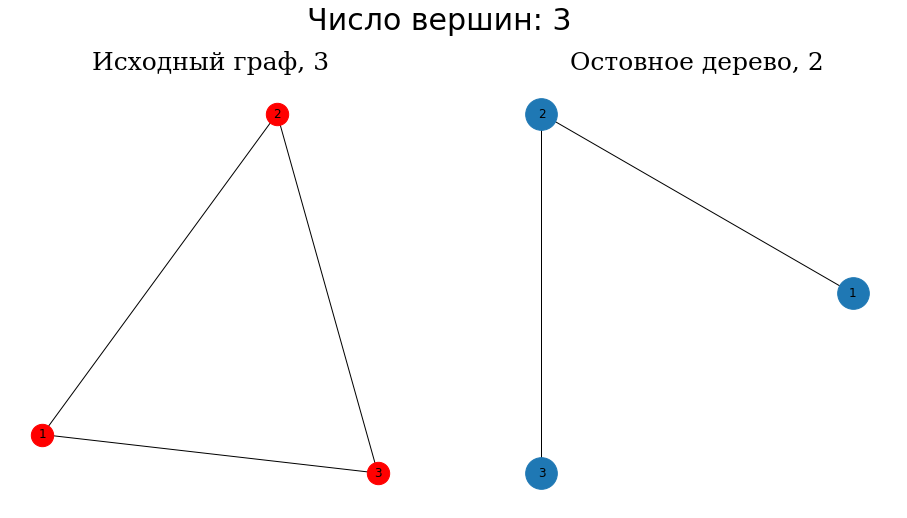

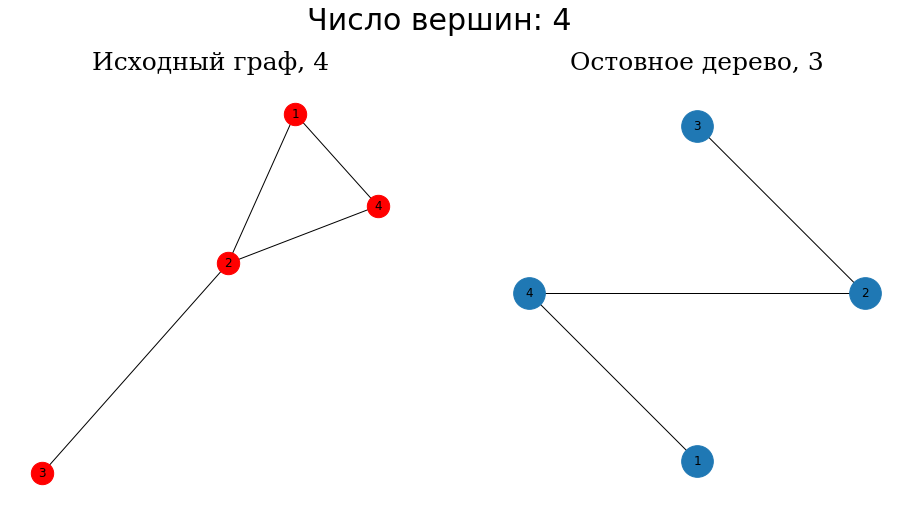

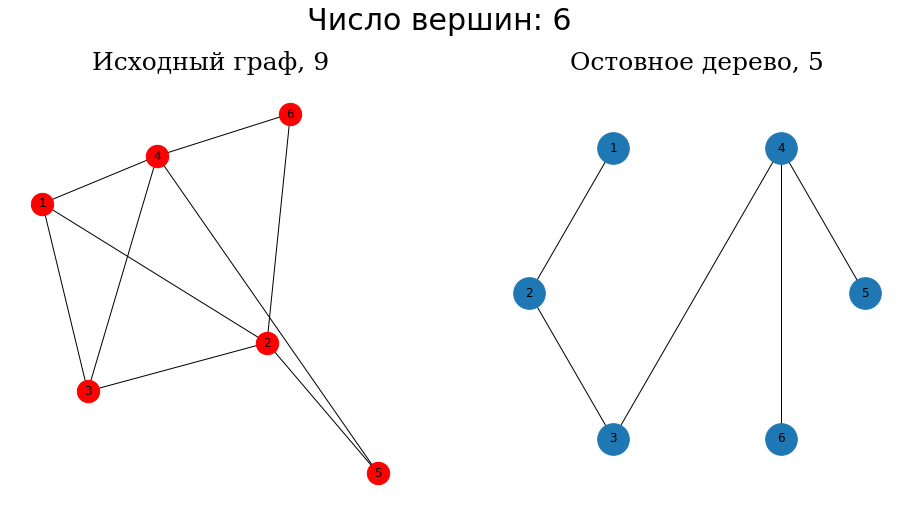

In [3]:
R3 = [(1, 2, 13), (1, 3, 18), (2, 3, 17)]
R4 = [(1, 2, 18), (2, 3, 3), (2, 4, 5), (1, 4, 14)]
R6 = [(1, 2, 5), (2, 3, 10), (1, 3, 17), (1, 4, 24), (2, 6, 22), (2, 5, 22), (5, 4, 3), (4, 6, 19), (3, 4, 11)]
R10 = [(1, 2, 55), (2, 3, 34), (1, 3, 3), (1, 4, 41), (2, 6, 22), (2, 5, 67), (5, 4, 2), (4, 6, 5), (3, 4, 11),
       (1, 7, 8), (2, 8, 23), (1, 9, 7), (4, 10, 4), (6, 10, 12)]
R15 = [(1, 2, 5), (2, 3, 6), (1, 3, 7), (1, 4, 8), (2, 6, 9), (2, 5, 10), (5, 4, 11), (4, 6, 12), (3, 4, 13),
       (6, 7, 14), (2, 8, 15), (5, 9, 16), (4, 10, 17), (6, 10, 18), (1, 11, 12), (2, 12, 5), (12, 13, 3),
       (5, 13, 7), (10, 14, 9), (8, 15, 4), (7, 15, 20)]
R20 = [(1, 2, 5), (2, 3, 6), (1, 3, 7), (1, 4, 8), (2, 6, 9), (2, 5, 10), (5, 4, 11), (4, 6, 12), (3, 4, 13),
       (6, 7, 14), (2, 8, 15), (5, 9, 16), (4, 10, 17), (6, 10, 18), (1, 11, 12), (2, 12, 5), (12, 13, 3),
       (5, 13, 7), (10, 14, 9), (8, 15, 4), (7, 15, 20), (1, 16, 5), (2, 17, 6), (1, 18, 7), (1, 19, 8), 
       (17, 6, 9), (19, 5, 10), (17, 20, 34), (14, 20, 5), (3, 16, 1)]

Kraskal(R3)
Kraskal(R4)
Kraskal(R6)

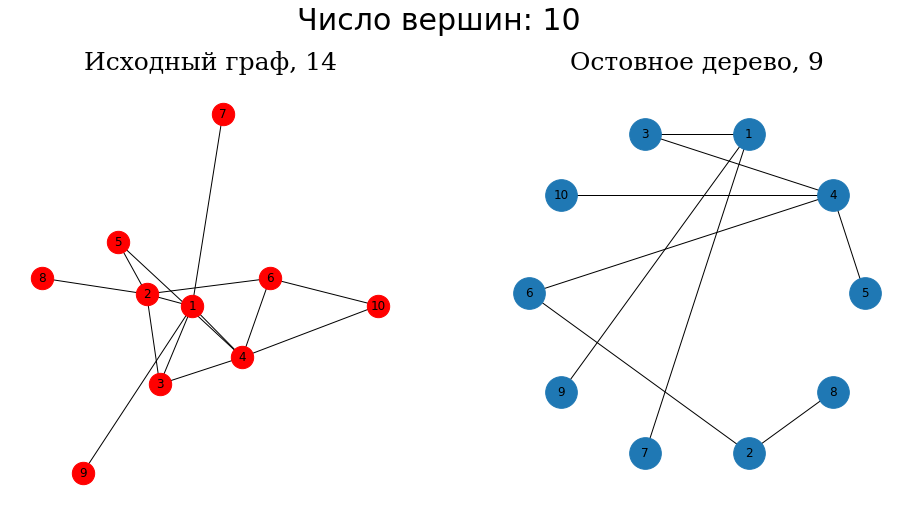

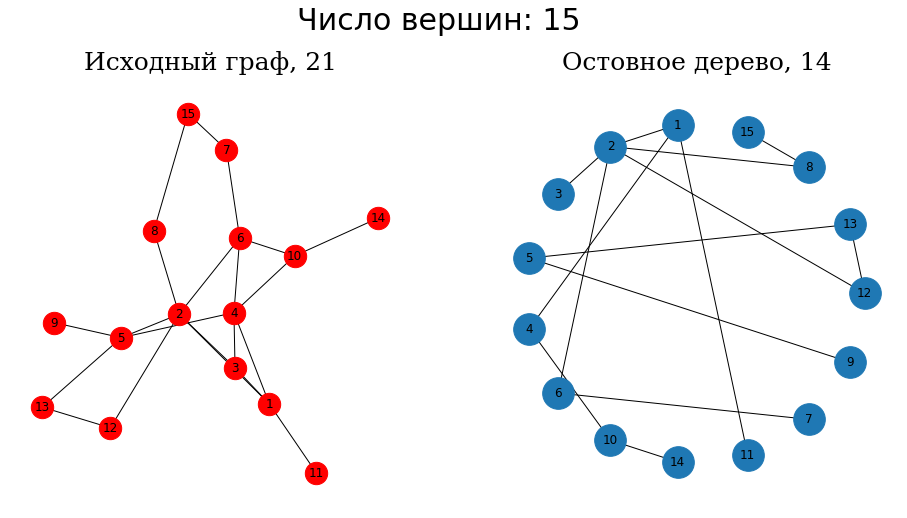

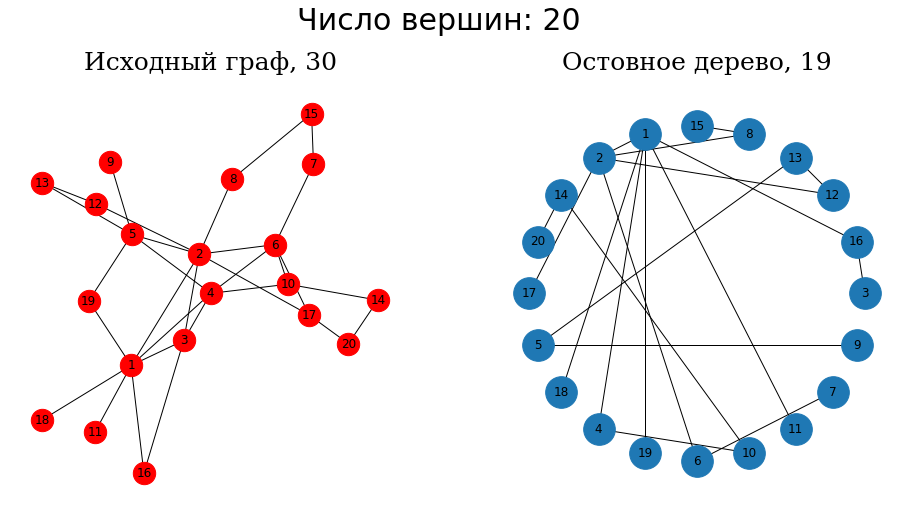

In [4]:
Kraskal(R10)
Kraskal(R15)
Kraskal(R20)
